# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/13_matrix_basics`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/13_matrix_basics/02_shapes_dimensions.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Matrix Basics: Shapes and Dimensions

This notebook explores tensor shapes and dimensions in PyTorch. Understanding
how to manipulate tensor shapes is crucial for efficient matrix operations.
We'll cover:

- Understanding tensor shapes and dimensions
- Shape manipulation operations (reshape, view, squeeze, unsqueeze)
- Broadcasting semantics
- Practical examples of shape transformations


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default figure size
plt.rcParams["figure.figsize"] = (10, 8)


## Understanding Tensor Shapes and Dimensions

A tensor's shape defines the size along each dimension. For example:
- A 1D tensor (vector) has shape `[n]`
- A 2D tensor (matrix) has shape `[rows, columns]`
- A 3D tensor has shape `[depth, rows, columns]`

Let's create tensors with different dimensions and examine their shapes:


In [2]:
# 0D tensor (scalar)
scalar = torch.tensor(42)
print(f"Scalar: {scalar}")
print(f"Shape: {scalar.shape}")
print(f"Dimensions: {scalar.dim()}\n")

# 1D tensor (vector)
vector = torch.tensor([1, 2, 3, 4, 5])
print(f"Vector: {vector}")
print(f"Shape: {vector.shape}")
print(f"Dimensions: {vector.dim()}\n")

# 2D tensor (matrix)
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Matrix:\n{matrix}")
print(f"Shape: {matrix.shape}")
print(f"Dimensions: {matrix.dim()}\n")

# 3D tensor
tensor_3d = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])
print(f"3D tensor:\n{tensor_3d}")
print(f"Shape: {tensor_3d.shape}")
print(f"Dimensions: {tensor_3d.dim()}\n")

# 4D tensor (often used for image batches: [batch_size, channels, height, width])
tensor_4d = torch.zeros(2, 3, 4, 4)
print(f"4D tensor shape: {tensor_4d.shape}")
print(f"Dimensions: {tensor_4d.dim()}")


Scalar: 42
Shape: torch.Size([])
Dimensions: 0

Vector: tensor([1, 2, 3, 4, 5])
Shape: torch.Size([5])
Dimensions: 1

Matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])
Dimensions: 2

3D tensor:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])
Dimensions: 3

4D tensor shape: torch.Size([2, 3, 4, 4])
Dimensions: 4


Let's visualize different tensors to better understand their shapes:


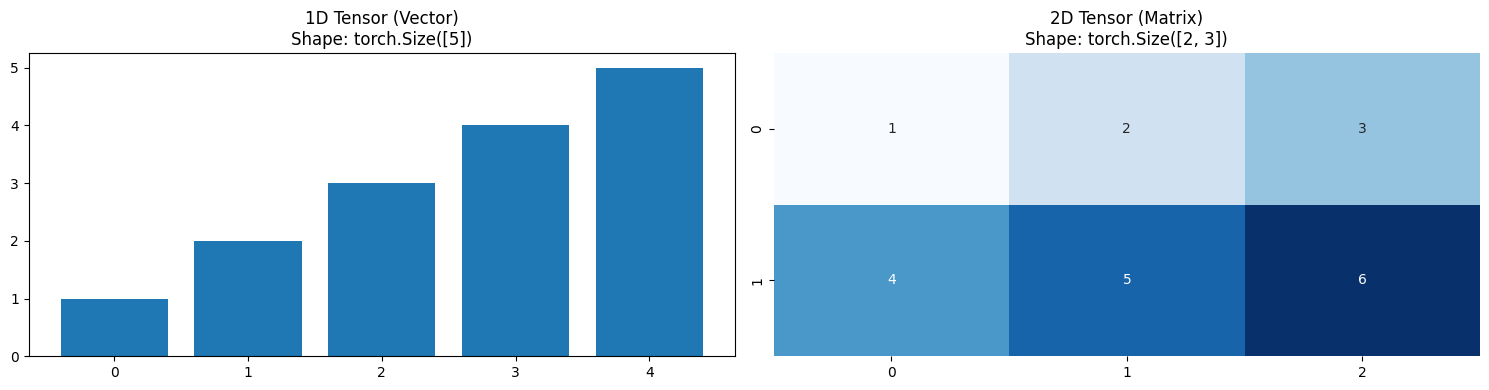

In [3]:
def visualize_tensors(tensors, titles):
    """Visualize tensors of different dimensions."""
    num_tensors = len(tensors)
    fig, axes = plt.subplots(1, num_tensors, figsize=(15, 4))
    
    if num_tensors == 1:
        axes = [axes]
    
    for i, (tensor, title) in enumerate(zip(tensors, titles)):
        if tensor.dim() <= 1:  # Scalar or vector
            axes[i].bar(range(max(1, len(tensor))), tensor.reshape(-1).numpy())
            axes[i].set_title(f"{title}\nShape: {tensor.shape}")
        elif tensor.dim() == 2:  # Matrix
            sns.heatmap(tensor.numpy(), annot=True, fmt="d", cmap="Blues", 
                      ax=axes[i], cbar=False)
            axes[i].set_title(f"{title}\nShape: {tensor.shape}")
        elif tensor.dim() == 3:  # 3D tensor - show each slice
            depth = tensor.shape[0]
            # Create a grid of depth x 1
            inner_fig, inner_axes = plt.subplots(depth, 1, figsize=(4, depth*2))
            for d in range(depth):
                sns.heatmap(tensor[d].numpy(), annot=True, fmt="d", 
                          cmap="Blues", ax=inner_axes[d], cbar=False)
                inner_axes[d].set_title(f"Slice {d}")
            inner_fig.tight_layout()
            inner_fig.savefig("temp_tensor_3d.png")
            plt.close(inner_fig)
            
            # Display the saved image
            axes[i].imshow(plt.imread("temp_tensor_3d.png"))
            axes[i].axis('off')
            axes[i].set_title(f"{title}\nShape: {tensor.shape}")
        
    plt.tight_layout()
    plt.show()

# Visualize 1D and 2D tensors
visualize_tensors([vector, matrix], ["1D Tensor (Vector)", "2D Tensor (Matrix)"])


## Shape Manipulation: reshape vs view

PyTorch provides two main functions for changing tensor shapes: `reshape` and `view`. 

- `view`: Returns a new tensor with the same data but different shape. The returned tensor shares the same data with the original tensor, so changing the contents of one will change the other.
- `reshape`: Similar to `view`, but may return a copy if the tensor is not contiguous.


In [4]:
# Create a 2x3 matrix
original = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Original tensor:\n{original}")
print(f"Shape: {original.shape}\n")

# Reshape to 3x2
reshaped = original.reshape(3, 2)
print(f"Reshaped to 3x2:\n{reshaped}")
print(f"Shape: {reshaped.shape}\n")

# Using view for the same operation
viewed = original.view(3, 2)
print(f"View to 3x2:\n{viewed}")
print(f"Shape: {viewed.shape}\n")

# Using -1 to automatically calculate one dimension
auto_reshaped = original.reshape(-1)  # Flatten to 1D
print(f"Reshaped to 1D (flattened):\n{auto_reshaped}")
print(f"Shape: {auto_reshaped.shape}")

# Verify view vs. reshape behavior with data sharing
print("\nDemonstrating data sharing:")
print(f"Original before: {original[0, 0]}")
viewed[0, 0] = 99
print(f"Original after changing viewed tensor: {original[0, 0]}")


Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])

Reshaped to 3x2:
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Shape: torch.Size([3, 2])

View to 3x2:
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Shape: torch.Size([3, 2])

Reshaped to 1D (flattened):
tensor([1, 2, 3, 4, 5, 6])
Shape: torch.Size([6])

Demonstrating data sharing:
Original before: 1
Original after changing viewed tensor: 99


Let's visualize these shape transformations:


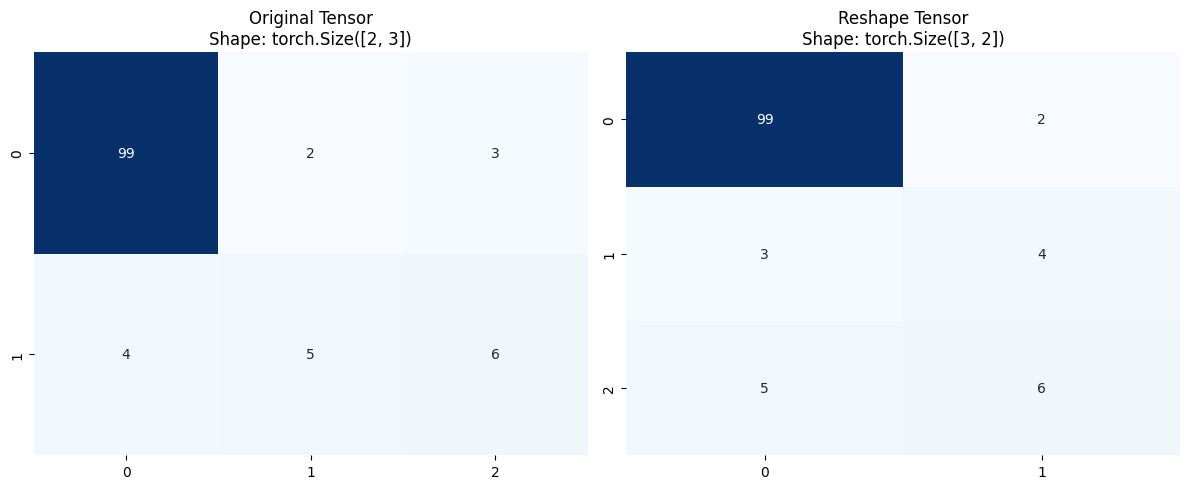

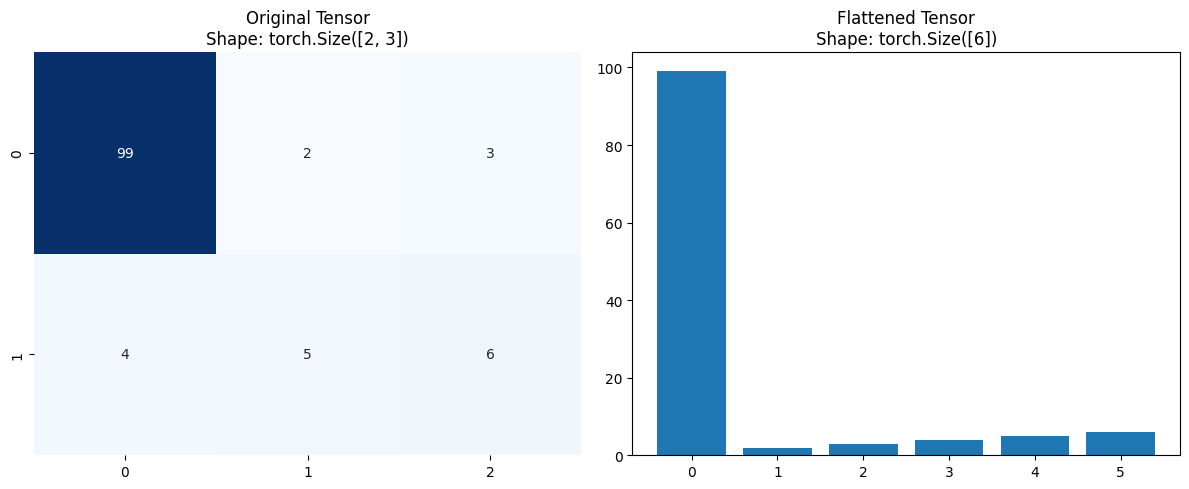

In [5]:
def visualize_reshape(original, reshaped, reshape_type="Reshape"):
    """Visualize tensor reshaping."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original tensor
    if original.dim() == 2:
        sns.heatmap(original.numpy(), annot=True, fmt="d", cmap="Blues", 
                  ax=axes[0], cbar=False)
        axes[0].set_title(f"Original Tensor\nShape: {original.shape}")
    else:
        axes[0].bar(range(len(original)), original.numpy())
        axes[0].set_title(f"Original Tensor\nShape: {original.shape}")
    
    # Reshaped tensor
    if reshaped.dim() == 2:
        sns.heatmap(reshaped.numpy(), annot=True, fmt="d", cmap="Blues", 
                  ax=axes[1], cbar=False)
        axes[1].set_title(f"{reshape_type} Tensor\nShape: {reshaped.shape}")
    else:
        axes[1].bar(range(len(reshaped)), reshaped.numpy())
        axes[1].set_title(f"{reshape_type} Tensor\nShape: {reshaped.shape}")
    
    plt.tight_layout()
    plt.show()

# Visualize reshaping
visualize_reshape(original, reshaped)

# Visualize flattening
visualize_reshape(original, auto_reshaped, "Flattened")


## Contiguity and Memory Layout

The difference between `view` and `reshape` lies in tensor contiguity. A tensor is contiguous when its elements are stored in a continuous block of memory.


In [6]:
# Create a matrix
original = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Original tensor:\n{original}")
print(f"Is contiguous: {original.is_contiguous()}\n")

# Create a non-contiguous tensor by transposing
transposed = original.t()  # Transpose - not contiguous in memory
print(f"Transposed tensor:\n{transposed}")
print(f"Is contiguous: {transposed.is_contiguous()}\n")

# Try to use view on a non-contiguous tensor
try:
    transposed.view(3, 2)
except RuntimeError as e:
    print(f"Error: {e}\n")

# Use reshape on a non-contiguous tensor (works fine)
reshaped = transposed.reshape(3, 2)
print(f"Reshaped from transposed:\n{reshaped}")

# Make contiguous and then use view
contiguous = transposed.contiguous()
print(f"Is contiguous after .contiguous(): {contiguous.is_contiguous()}")
viewed = contiguous.view(3, 2)
print(f"Viewed after making contiguous:\n{viewed}")


Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Is contiguous: True

Transposed tensor:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
Is contiguous: False

Reshaped from transposed:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
Is contiguous after .contiguous(): True
Viewed after making contiguous:
tensor([[1, 4],
        [2, 5],
        [3, 6]])


## Understanding memory layout with strides

A tensor's stride describes how many elements to skip to move by 1 in each dimension:


In [7]:
# Create a 2x3 matrix
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"Matrix:\n{matrix}")
print(f"Shape: {matrix.shape}")
print(f"Strides: {matrix.stride()}")  # Elements to skip for each dimension
print(f"Is contiguous: {matrix.is_contiguous()}\n")

# Transpose the matrix
transposed = matrix.t()
print(f"Transposed:\n{transposed}")
print(f"Shape: {transposed.shape}")
print(f"Strides: {transposed.stride()}")  # Note how the strides are reversed
print(f"Is contiguous: {transposed.is_contiguous()}\n")

# Make the transposed contiguous
contiguous = transposed.contiguous()
print(f"Contiguous version of transposed:\n{contiguous}")
print(f"Shape: {contiguous.shape}")
print(f"Strides: {contiguous.stride()}")
print(f"Is contiguous: {contiguous.is_contiguous()}")


Matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])
Strides: (3, 1)
Is contiguous: True

Transposed:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
Shape: torch.Size([3, 2])
Strides: (1, 3)
Is contiguous: False

Contiguous version of transposed:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
Shape: torch.Size([3, 2])
Strides: (2, 1)
Is contiguous: True


## squeeze and unsqueeze: Removing and Adding Dimensions

- `squeeze`: Removes dimensions of size 1
- `unsqueeze`: Adds a dimension of size 1 at the specified position


In [8]:
# Create a 3x1 matrix
matrix = torch.tensor([[1], [2], [3]])
print(f"Original matrix:\n{matrix}")
print(f"Shape: {matrix.shape}\n")

# Squeeze to remove dimension of size 1
squeezed = matrix.squeeze()
print(f"After squeeze:\n{squeezed}")
print(f"Shape: {squeezed.shape}\n")

# Squeeze a specific dimension
squeezed_dim1 = matrix.squeeze(1)
print(f"After squeeze(1):\n{squeezed_dim1}")
print(f"Shape: {squeezed_dim1.shape}\n")

# Now unsqueeze to add dimensions
# Add dimension at position 0
unsqueezed_0 = squeezed.unsqueeze(0)
print(f"After unsqueeze(0):\n{unsqueezed_0}")
print(f"Shape: {unsqueezed_0.shape}\n")

# Add dimension at position 1
unsqueezed_1 = squeezed.unsqueeze(1)
print(f"After unsqueeze(1):\n{unsqueezed_1}")
print(f"Shape: {unsqueezed_1.shape}")


Original matrix:
tensor([[1],
        [2],
        [3]])
Shape: torch.Size([3, 1])

After squeeze:
tensor([1, 2, 3])
Shape: torch.Size([3])

After squeeze(1):
tensor([1, 2, 3])
Shape: torch.Size([3])

After unsqueeze(0):
tensor([[1, 2, 3]])
Shape: torch.Size([1, 3])

After unsqueeze(1):
tensor([[1],
        [2],
        [3]])
Shape: torch.Size([3, 1])


Let's visualize `squeeze` and `unsqueeze` operations:


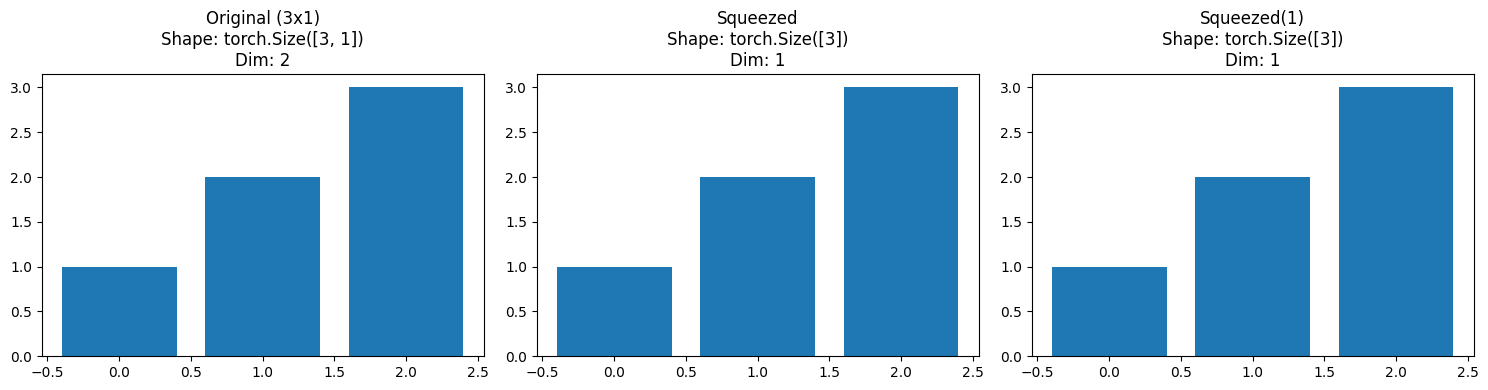

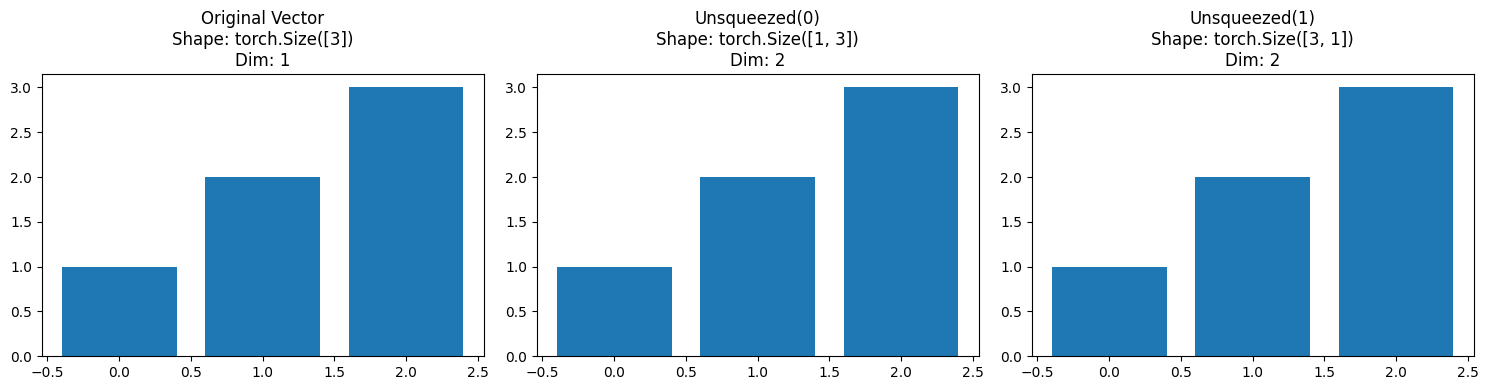

In [9]:
def visualize_squeeze_unsqueeze(tensors, titles):
    """Visualize squeeze and unsqueeze operations."""
    fig, axes = plt.subplots(1, len(tensors), figsize=(15, 4))
    
    if len(tensors) == 1:
        axes = [axes]
    
    for i, (tensor, title) in enumerate(zip(tensors, titles)):
        shape_str = f"Shape: {tensor.shape}"
        dim_str = f"Dim: {tensor.dim()}"
        
        if tensor.dim() <= 1:  # Scalar or vector
            axes[i].bar(range(max(1, len(tensor.reshape(-1)))), 
                        tensor.reshape(-1).numpy())
        else:  # 2D or higher
            if tensor.dim() == 2 and (tensor.shape[0] == 1 or tensor.shape[1] == 1):
                # Special case for tensors with a dimension of 1
                axes[i].bar(range(max(tensor.shape)), tensor.reshape(-1).numpy())
            else:
                sns.heatmap(tensor.numpy(), annot=True, fmt="d", cmap="Blues", 
                          ax=axes[i], cbar=False)
        
        axes[i].set_title(f"{title}\n{shape_str}\n{dim_str}")
    
    plt.tight_layout()
    plt.show()

# Visualize squeeze operations
visualize_squeeze_unsqueeze(
    [matrix, squeezed, squeezed_dim1],
    ["Original (3x1)", "Squeezed", "Squeezed(1)"]
)

# Visualize unsqueeze operations
visualize_squeeze_unsqueeze(
    [squeezed, unsqueezed_0, unsqueezed_1],
    ["Original Vector", "Unsqueezed(0)", "Unsqueezed(1)"]
)


## Broadcasting in PyTorch

Broadcasting allows PyTorch to perform operations on tensors of different shapes. The smaller tensor is "broadcast" to match the shape of the larger tensor.

The rules for broadcasting are:
1. If tensors don't have the same number of dimensions, prepend dimensions of size 1 to the smaller tensor until both have the same number of dimensions
2. Then, for each dimension, the sizes must either match or one of them must be 1


In [10]:
# Create tensors of different shapes
vector = torch.tensor([1, 2, 3])
matrix = torch.tensor([[4, 5, 6], [7, 8, 9]])

print(f"Vector shape: {vector.shape}")
print(f"Matrix shape: {matrix.shape}\n")

# Broadcasting in addition
result = vector + matrix
print(f"Vector + Matrix (broadcasting):\n{result}")
print(f"Result shape: {result.shape}\n")

# How broadcasting works:
# 1. Vector [1, 2, 3] is expanded to [[1, 2, 3], [1, 2, 3]]
# 2. Then the addition is performed element-wise

# Another example with more dimensions
tensor_a = torch.tensor([[[1, 2]]])  # Shape: [1, 1, 2]
tensor_b = torch.tensor([3, 4])      # Shape: [2]

print(f"Tensor A shape: {tensor_a.shape}")
print(f"Tensor B shape: {tensor_b.shape}")

result = tensor_a + tensor_b
print(f"\nTensor A + Tensor B (broadcasting):\n{result}")
print(f"Result shape: {result.shape}")


Vector shape: torch.Size([3])
Matrix shape: torch.Size([2, 3])

Vector + Matrix (broadcasting):
tensor([[ 5,  7,  9],
        [ 8, 10, 12]])
Result shape: torch.Size([2, 3])

Tensor A shape: torch.Size([1, 1, 2])
Tensor B shape: torch.Size([2])

Tensor A + Tensor B (broadcasting):
tensor([[[4, 6]]])
Result shape: torch.Size([1, 1, 2])


Let's visualize how broadcasting works:


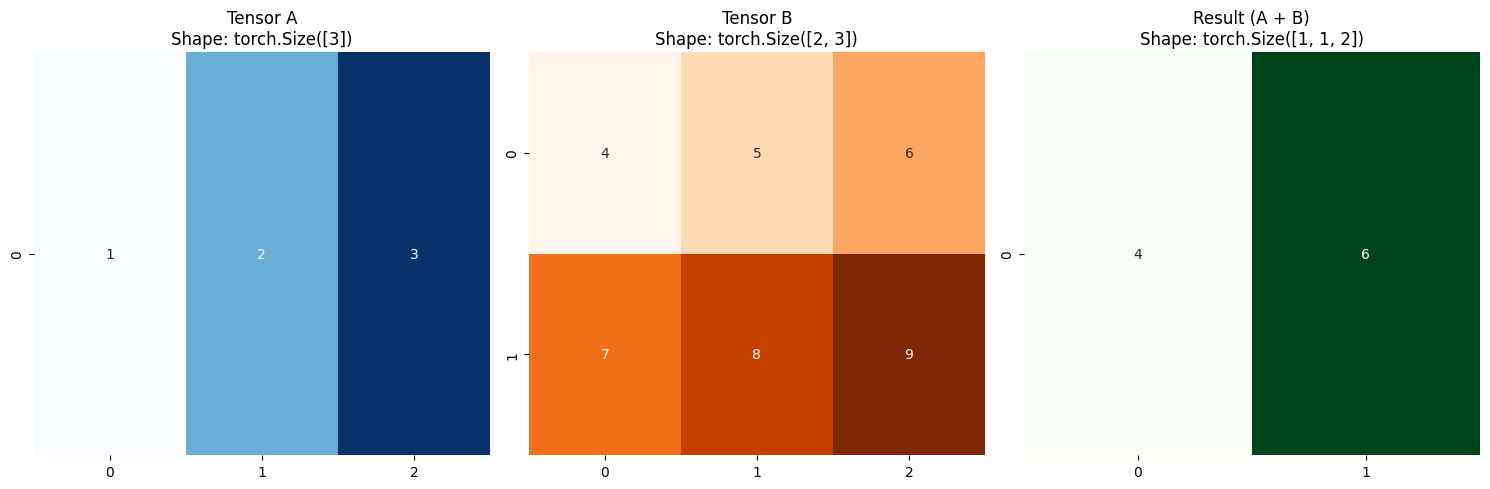

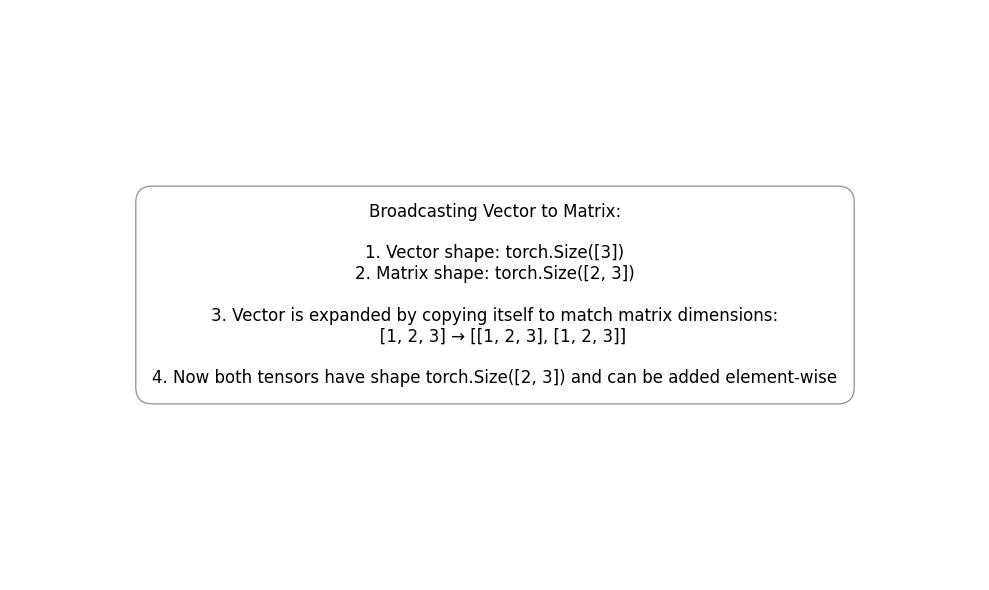

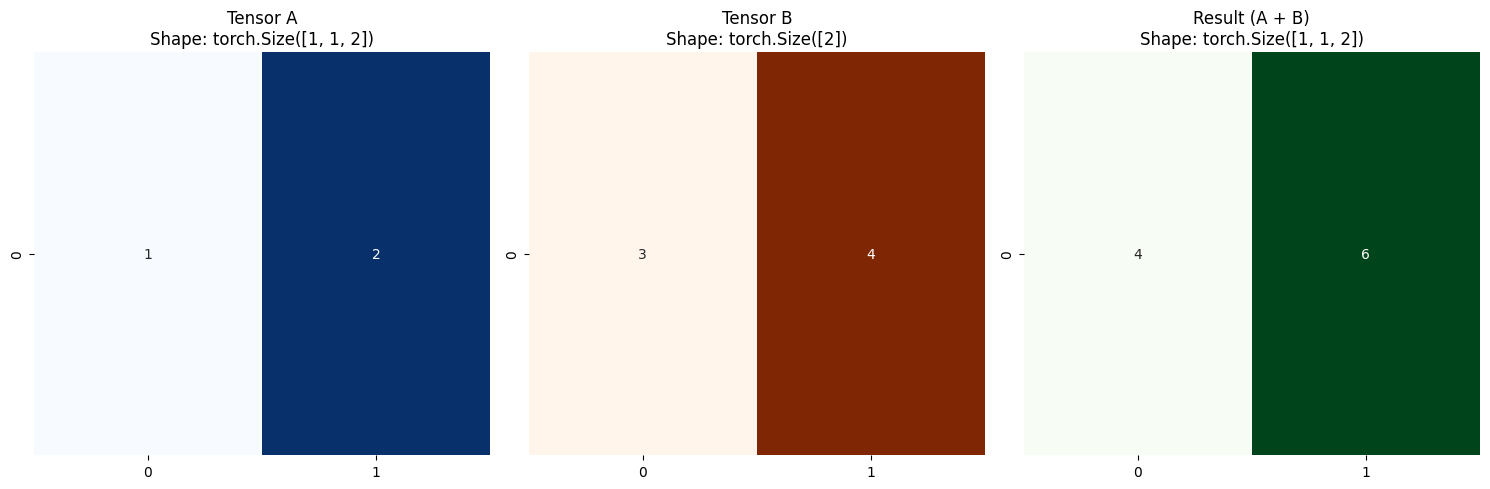

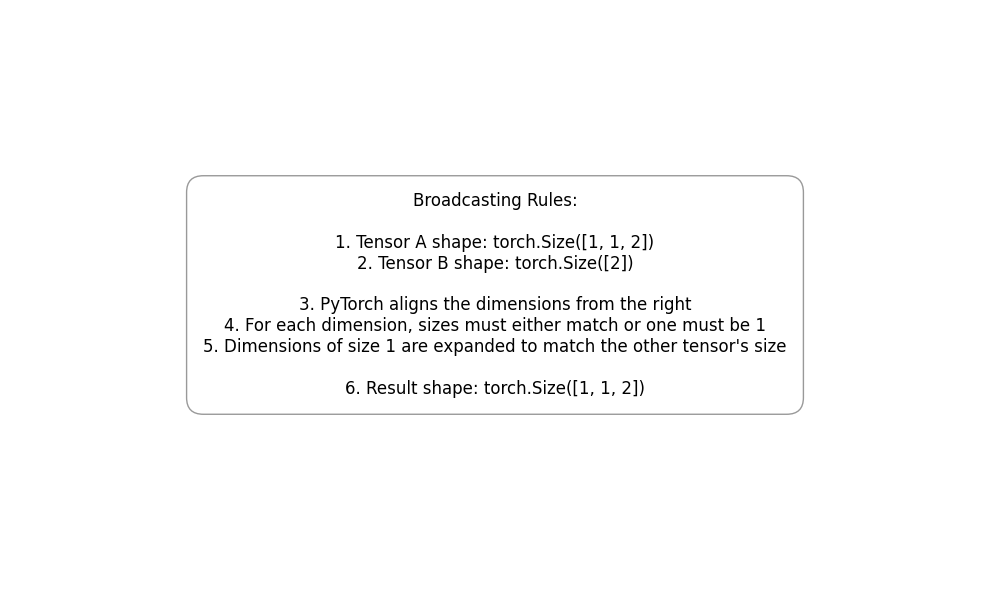

In [11]:
def visualize_broadcasting(a, b, result, operation="+"):
    """Visualize tensor broadcasting."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Helper function to make tensors visualizable
    def prepare_tensor(t):
        # Get the tensor in 2D form for visualization
        if t.dim() == 1:
            return t.unsqueeze(0)
        elif t.dim() > 2:
            return t.reshape(t.shape[0], -1)
        return t
    
    # Visualize first tensor
    a_vis = prepare_tensor(a)
    sns.heatmap(a_vis.numpy(), annot=True, fmt="d", cmap="Blues", 
               ax=axes[0], cbar=False)
    axes[0].set_title(f"Tensor A\nShape: {a.shape}")
    
    # Visualize second tensor
    b_vis = prepare_tensor(b)
    sns.heatmap(b_vis.numpy(), annot=True, fmt="d", cmap="Oranges", 
               ax=axes[1], cbar=False)
    axes[1].set_title(f"Tensor B\nShape: {b.shape}")
    
    # Visualize result
    result_vis = prepare_tensor(result)
    sns.heatmap(result_vis.numpy(), annot=True, fmt="d", cmap="Greens", 
               ax=axes[2], cbar=False)
    axes[2].set_title(f"Result (A {operation} B)\nShape: {result.shape}")
    
    plt.tight_layout()
    plt.show()
    
    # Now, show the broadcasting animation
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')
    
    # Create text explanation of broadcasting
    if a.dim() == 1 and b.dim() == 2:
        # Case where vector is broadcast to matrix
        text = (f"Broadcasting Vector to Matrix:\n\n"
                f"1. Vector shape: {a.shape}\n"
                f"2. Matrix shape: {b.shape}\n\n"
                f"3. Vector is expanded by copying itself to match matrix dimensions:\n"
                f"   [{a[0]}, {a[1]}, {a[2]}] → [[{a[0]}, {a[1]}, {a[2]}], [{a[0]}, {a[1]}, {a[2]}]]\n\n"
                f"4. Now both tensors have shape {b.shape} and can be added element-wise")
    else:
        # General case
        text = (f"Broadcasting Rules:\n\n"
                f"1. Tensor A shape: {a.shape}\n"
                f"2. Tensor B shape: {b.shape}\n\n"
                f"3. PyTorch aligns the dimensions from the right\n"
                f"4. For each dimension, sizes must either match or one must be 1\n"
                f"5. Dimensions of size 1 are expanded to match the other tensor's size\n\n"
                f"6. Result shape: {result.shape}")
    
    ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=12, 
           bbox=dict(boxstyle="round,pad=1", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Visualize vector + matrix broadcasting
visualize_broadcasting(vector, matrix, result)

# Visualize more complex broadcasting
visualize_broadcasting(tensor_a, tensor_b, tensor_a + tensor_b)


## Practical Examples of Shape Manipulation

Let's look at some common use cases for shape manipulation in deep learning and data processing.


In [12]:
# Example 1: Batch processing - adding batch dimension to a single sample
# A single image with shape [channels, height, width]
image = torch.randn(3, 32, 32)  # 3 channels, 32x32 pixels
print(f"Single image shape: {image.shape}")

# Add batch dimension for batch processing
batched_image = image.unsqueeze(0)  # Shape becomes [1, channels, height, width]
print(f"Batched image shape: {batched_image.shape}\n")

# Example 2: Flattening for linear layers
# Neural networks often require flattening tensors before passing to linear layers
feature_map = torch.randn(16, 4, 4)  # [channels, height, width]
print(f"Feature map shape: {feature_map.shape}")

# Flatten all dimensions except the first (batch)
flattened = feature_map.reshape(16, -1)  # -1 means "infer this dimension"
print(f"Flattened feature map shape: {flattened.shape}\n")

# Example 3: Reshaping for attention mechanisms
# Self-attention in transformers requires reshaping sequence data
sequence = torch.randn(8, 10, 64)  # [batch_size, sequence_length, embedding_dim]
print(f"Sequence data shape: {sequence.shape}")

# Reshape for multi-head attention (4 heads)
num_heads = 4
head_dim = 64 // num_heads
multihead = sequence.reshape(8, 10, num_heads, head_dim)
print(f"Multi-head attention shape: {multihead.shape}")

# Transpose for attention computation
transposed = multihead.permute(0, 2, 1, 3)  # [batch, heads, seq_len, head_dim]
print(f"Transposed for attention: {transposed.shape}\n")

# Example 4: Adding time dimension for RNNs
# Recurrent networks need sequence data with time dimension
features = torch.randn(32, 10)  # [batch_size, feature_dim]
print(f"Features shape: {features.shape}")

# Add time dimension for RNN input
time_steps = 5
sequence_input = features.unsqueeze(1).expand(-1, time_steps, -1)
print(f"RNN input with time dimension: {sequence_input.shape}")


Single image shape: torch.Size([3, 32, 32])
Batched image shape: torch.Size([1, 3, 32, 32])

Feature map shape: torch.Size([16, 4, 4])
Flattened feature map shape: torch.Size([16, 16])

Sequence data shape: torch.Size([8, 10, 64])
Multi-head attention shape: torch.Size([8, 10, 4, 16])
Transposed for attention: torch.Size([8, 4, 10, 16])

Features shape: torch.Size([32, 10])
RNN input with time dimension: torch.Size([32, 5, 10])


## Conclusion

In this notebook, we've covered the essential aspects of tensor shapes and dimensions in PyTorch:

- Understanding tensor dimensions and shapes
- Manipulating shapes with `reshape` and `view`
- Memory layout and tensor contiguity 
- Adding or removing dimensions with `squeeze` and `unsqueeze`
- Broadcasting rules for operations on tensors with different shapes
- Practical examples of shape transformations in deep learning

These operations are fundamental for efficient tensor manipulation in PyTorch and form the basis for more complex operations in deep learning and scientific computing.